Project by Yahia Yakout

### In this project, we aim to predict the prices of used cars in Egypt (after the EGP floating occured last March) based on various features by leveraging data scraped from the Hatla2ee website. The project involves several key steps including web scraping, exploratory data analysis (EDA), data cleaning, feature extraction, feature encoding, and machine learning model evaluation.

# Scraping The Hatla2ee website to create our dataset

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
from time import sleep
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

total_counter = 0

# Function to create a session with retry mechanism
def create_session():
    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))
    session.mount('http://', HTTPAdapter(max_retries=retries))
    return session

# Open a CSV file in write mode
with open('hatla2ee_scraped_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Define fieldnames for the CSV file
    fieldnames = ['Name', 'Price', 'Color', 'Mileage', 'Make', 'Model', 'City', 'Date Displayed', 'Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control', 'Item URL']
    
    # Initialize a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    session = create_session()

    for i in range(1, 1000):
        url = f"https://eg.hatla2ee.com/en/car/page/{i}"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        try:
            # Send a GET request to the URL using the session
            response = session.get(url, headers=headers)
            response.raise_for_status()  # Raises HTTPError for bad responses

            # Parse the HTML content
            soup = BeautifulSoup(response.content, "html.parser")

            # Find all car cards
            car_cards = soup.find_all("div", class_="newCarListUnit_contain")
            if not car_cards:
                break

            counter = 0

            # Iterate over each car card
            for card in car_cards:
                car_data = {
                    'Name': None, 'Price': None, 'Color': None, 'Mileage': None,
                    'Make': None, 'Model': None, 'City': None, 'Date Displayed': None,
                    'Automatic Transmission': 'No', 'Air Conditioner': 'No',
                    'Power Steering': 'No', 'Remote Control': 'No', 'Item URL': None
                }

                try:
                    car_data['Name'] = card.find("div", class_="newCarListUnit_header").text.strip()
                except AttributeError:
                    pass

                try:
                    car_data['Price'] = card.find("div", class_="main_price").text.strip()
                    if car_data['Price'] == "-":
                        car_data['Price'] = None
                except AttributeError:
                    pass

                try:
                    meta_tags = card.find_all("span", class_="newCarListUnit_metaTag")
                    car_data['Color'] = meta_tags[0].text.strip()
                    car_data['Mileage'] = meta_tags[-1].text.strip()
                    if car_data['Mileage'] == "- Km":
                        car_data['Mileage'] = None
                except (AttributeError, IndexError):
                    pass

                try:
                    meta_links = card.find("div", class_="newCarListUnit_metaTags").find_all("span", class_="newCarListUnit_metaLink")
                    car_data['Make'] = meta_links[0].text.strip()
                    car_data['Model'] = meta_links[1].text.strip()
                    car_data['City'] = meta_links[-1].text.strip()
                except (AttributeError, IndexError):
                    pass

                try:
                    car_data['Date Displayed'] = card.find("div", class_="otherData_Date").find("span").text.strip()
                except AttributeError:
                    pass
                
                try:
                    icons_element = card.find("div", class_="otherData_carType")
                    if icons_element.find('i', {'title': 'Automatic'}):
                        car_data['Automatic Transmission'] = 'Yes'
                    if icons_element.find('i', {'title': 'Air Conditioner'}):
                        car_data['Air Conditioner'] = 'Yes'
                    if icons_element.find('i', {'title': 'Power Steering'}):
                        car_data['Power Steering'] = 'Yes'
                    if icons_element.find('i', {'title': 'Remote Control'}):
                        car_data['Remote Control'] = 'Yes'
                except AttributeError:
                    pass
                
                try:
                    car_data['Item URL'] = f"https://eg.hatla2ee.com{card.find('div', class_='newMainImg').find('a').get('href')}"
                except AttributeError:
                    pass
                
                # Write the row to the CSV file
                writer.writerow(car_data)
                counter += 1

            print(f"***** Page {i} Scrapped Successfully with {counter} Items *****")
            total_counter += counter
            sleep(5)
        except requests.RequestException as e:
            print(f"Error occurred while scraping page {i}: {e}")
            sleep(30)

print(f"\n***** Total Number of the Scrapped Items is {total_counter} *****\n")


***** Page 1 Scrapped Successfully with 40 Items *****
***** Page 2 Scrapped Successfully with 40 Items *****
***** Page 3 Scrapped Successfully with 40 Items *****
***** Page 4 Scrapped Successfully with 40 Items *****
***** Page 5 Scrapped Successfully with 40 Items *****
***** Page 6 Scrapped Successfully with 40 Items *****
***** Page 7 Scrapped Successfully with 40 Items *****
***** Page 8 Scrapped Successfully with 40 Items *****
***** Page 9 Scrapped Successfully with 40 Items *****
***** Page 10 Scrapped Successfully with 40 Items *****
***** Page 11 Scrapped Successfully with 40 Items *****
***** Page 12 Scrapped Successfully with 40 Items *****
***** Page 13 Scrapped Successfully with 40 Items *****
***** Page 14 Scrapped Successfully with 40 Items *****
***** Page 15 Scrapped Successfully with 40 Items *****
***** Page 16 Scrapped Successfully with 40 Items *****
***** Page 17 Scrapped Successfully with 40 Items *****
***** Page 18 Scrapped Successfully with 40 Items *****
*

***** Page 147 Scrapped Successfully with 30 Items *****
***** Page 148 Scrapped Successfully with 30 Items *****
***** Page 149 Scrapped Successfully with 30 Items *****
***** Page 150 Scrapped Successfully with 30 Items *****
***** Page 151 Scrapped Successfully with 30 Items *****
***** Page 152 Scrapped Successfully with 30 Items *****
***** Page 153 Scrapped Successfully with 30 Items *****
***** Page 154 Scrapped Successfully with 30 Items *****
***** Page 155 Scrapped Successfully with 30 Items *****
***** Page 156 Scrapped Successfully with 30 Items *****
***** Page 157 Scrapped Successfully with 30 Items *****
***** Page 158 Scrapped Successfully with 30 Items *****
***** Page 159 Scrapped Successfully with 30 Items *****
***** Page 160 Scrapped Successfully with 30 Items *****
***** Page 161 Scrapped Successfully with 30 Items *****
***** Page 162 Scrapped Successfully with 30 Items *****
***** Page 163 Scrapped Successfully with 30 Items *****
***** Page 164 Scrapped Success

***** Page 291 Scrapped Successfully with 30 Items *****
***** Page 292 Scrapped Successfully with 30 Items *****
***** Page 293 Scrapped Successfully with 30 Items *****
***** Page 294 Scrapped Successfully with 30 Items *****
***** Page 295 Scrapped Successfully with 30 Items *****
***** Page 296 Scrapped Successfully with 30 Items *****
***** Page 297 Scrapped Successfully with 30 Items *****
***** Page 298 Scrapped Successfully with 30 Items *****
***** Page 299 Scrapped Successfully with 30 Items *****
***** Page 300 Scrapped Successfully with 30 Items *****
***** Page 301 Scrapped Successfully with 30 Items *****
***** Page 302 Scrapped Successfully with 30 Items *****
***** Page 303 Scrapped Successfully with 30 Items *****
***** Page 304 Scrapped Successfully with 30 Items *****
***** Page 305 Scrapped Successfully with 30 Items *****
***** Page 306 Scrapped Successfully with 30 Items *****
***** Page 307 Scrapped Successfully with 30 Items *****
***** Page 308 Scrapped Success

***** Page 435 Scrapped Successfully with 30 Items *****
***** Page 436 Scrapped Successfully with 30 Items *****
***** Page 437 Scrapped Successfully with 30 Items *****
***** Page 438 Scrapped Successfully with 30 Items *****
***** Page 439 Scrapped Successfully with 30 Items *****
***** Page 440 Scrapped Successfully with 30 Items *****
***** Page 441 Scrapped Successfully with 30 Items *****
***** Page 442 Scrapped Successfully with 30 Items *****
***** Page 443 Scrapped Successfully with 30 Items *****
***** Page 444 Scrapped Successfully with 30 Items *****
***** Page 445 Scrapped Successfully with 30 Items *****
***** Page 446 Scrapped Successfully with 30 Items *****
***** Page 447 Scrapped Successfully with 30 Items *****
***** Page 448 Scrapped Successfully with 30 Items *****
***** Page 449 Scrapped Successfully with 30 Items *****
***** Page 450 Scrapped Successfully with 30 Items *****
***** Page 451 Scrapped Successfully with 30 Items *****
***** Page 452 Scrapped Success

***** Page 579 Scrapped Successfully with 30 Items *****
***** Page 580 Scrapped Successfully with 30 Items *****
***** Page 581 Scrapped Successfully with 30 Items *****
***** Page 582 Scrapped Successfully with 30 Items *****
***** Page 583 Scrapped Successfully with 30 Items *****
***** Page 584 Scrapped Successfully with 30 Items *****
***** Page 585 Scrapped Successfully with 30 Items *****
***** Page 586 Scrapped Successfully with 30 Items *****
***** Page 587 Scrapped Successfully with 30 Items *****
***** Page 588 Scrapped Successfully with 30 Items *****
***** Page 589 Scrapped Successfully with 30 Items *****
***** Page 590 Scrapped Successfully with 30 Items *****
***** Page 591 Scrapped Successfully with 30 Items *****
***** Page 592 Scrapped Successfully with 30 Items *****
***** Page 593 Scrapped Successfully with 30 Items *****
***** Page 594 Scrapped Successfully with 30 Items *****
***** Page 595 Scrapped Successfully with 30 Items *****
***** Page 596 Scrapped Success

***** Page 723 Scrapped Successfully with 30 Items *****
***** Page 724 Scrapped Successfully with 30 Items *****
***** Page 725 Scrapped Successfully with 30 Items *****
***** Page 726 Scrapped Successfully with 30 Items *****
***** Page 727 Scrapped Successfully with 30 Items *****
***** Page 728 Scrapped Successfully with 30 Items *****
***** Page 729 Scrapped Successfully with 30 Items *****
***** Page 730 Scrapped Successfully with 30 Items *****
***** Page 731 Scrapped Successfully with 30 Items *****
***** Page 732 Scrapped Successfully with 30 Items *****
***** Page 733 Scrapped Successfully with 30 Items *****
***** Page 734 Scrapped Successfully with 30 Items *****
***** Page 735 Scrapped Successfully with 30 Items *****
***** Page 736 Scrapped Successfully with 30 Items *****
***** Page 737 Scrapped Successfully with 30 Items *****
***** Page 738 Scrapped Successfully with 30 Items *****
***** Page 739 Scrapped Successfully with 30 Items *****
***** Page 740 Scrapped Success

***** Page 867 Scrapped Successfully with 30 Items *****
***** Page 868 Scrapped Successfully with 30 Items *****
***** Page 869 Scrapped Successfully with 30 Items *****
***** Page 870 Scrapped Successfully with 30 Items *****
***** Page 871 Scrapped Successfully with 30 Items *****
***** Page 872 Scrapped Successfully with 30 Items *****
***** Page 873 Scrapped Successfully with 30 Items *****
***** Page 874 Scrapped Successfully with 30 Items *****
***** Page 875 Scrapped Successfully with 30 Items *****
***** Page 876 Scrapped Successfully with 30 Items *****
***** Page 877 Scrapped Successfully with 30 Items *****
***** Page 878 Scrapped Successfully with 30 Items *****
***** Page 879 Scrapped Successfully with 30 Items *****
***** Page 880 Scrapped Successfully with 30 Items *****
***** Page 881 Scrapped Successfully with 30 Items *****
***** Page 882 Scrapped Successfully with 30 Items *****
***** Page 883 Scrapped Successfully with 30 Items *****
***** Page 884 Scrapped Success

# EDA & Feature Engineering

### Note: in this project we had done some of the encodings before handling the missing values and outliers, we did that for features that are categorical and we checked their unique values before proceeding so we were sure there were no missing values or outliers. However, we recommend to do handle the outliers and missing values before encoding and feature extraction 

In [743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [744]:
df = pd.read_csv("./hatla2ee_scraped_data.csv")

In [745]:
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Renault Megane 2019,"780,000 EGP",White,"150,000 Km",Renault,Megane,Obour City,2024-06-04,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/renault/megane/...
1,Suzuki Ciaz 2022,"600,000 EGP",Silver,"60,000 Km",Suzuki,Ciaz,Sheikh Zayed City,2024-06-04,No,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/suzuki/ciaz/650...
2,Jeep Renegade 2020,"1,600,000 EGP",Dark grey,"59,000 Km",Jeep,Renegade,Nasr city,2024-06-04,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/jeep/Renegade/6...
3,Hyundai I10 2013,"370,000 EGP",Silver,"228,000 Km",Hyundai,I10,Heliopolis,2024-06-04,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/i10/650...
4,BMW 318 2010,"670,000 EGP",Silver,"238,000 Km",BMW,318,Shibin El Qanater,2024-06-04,No,No,No,No,https://eg.hatla2ee.com/en/car/bmw/318/6508168


In [746]:
df.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,30634,30588,30634,29170,30634,30634,30634,30634,30634,30634,30634,30634,30634
unique,4373,915,24,1343,96,871,105,122,2,2,2,2,30595
top,Mitsubishi Lancer EX Shark 2016,"650,000 EGP",Silver,"200,000 Km",Hyundai,Sunny,Cairo,2024-06-04,Yes,Yes,No,Yes,https://eg.hatla2ee.com/en/car/fiat/127/6434625
freq,179,743,6381,1405,3832,1232,4293,1132,18377,17502,15484,16075,2


In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30634 entries, 0 to 30633
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    30634 non-null  object
 1   Price                   30588 non-null  object
 2   Color                   30634 non-null  object
 3   Mileage                 29170 non-null  object
 4   Make                    30634 non-null  object
 5   Model                   30634 non-null  object
 6   City                    30634 non-null  object
 7   Date Displayed          30634 non-null  object
 8   Automatic Transmission  30634 non-null  object
 9   Air Conditioner         30634 non-null  object
 10  Power Steering          30634 non-null  object
 11  Remote Control          30634 non-null  object
 12  Item URL                30634 non-null  object
dtypes: object(13)
memory usage: 3.0+ MB


All the features are stored as objects as we can see, we should convert all of the features to their appropriate data types first in order to be able to do some Exploratory Data Analysis. (Note: apparently, there are no missing values for any of the features except for Price and Mileage, so we will handle their missing values in a later stage beside handling the outliers) 

## Feature Type Conversion and Encoding

let's first convert the price column

In [748]:
def clean_price(price):
    if isinstance(price, str):
     # Remove commas and extract the numeric part
        numeric_part = price.split()[0].replace(',', '')
        # Convert to integer
        return int(numeric_part)

In [749]:
ser=df["Price"].apply(clean_price)

In [750]:
ser.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30634 entries, 0 to 30633
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
30588 non-null  float64
dtypes: float64(1)
memory usage: 239.5 KB


In [751]:
ser.dtype

dtype('float64')

In [752]:
df["Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30634 entries, 0 to 30633
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
30588 non-null  object
dtypes: object(1)
memory usage: 239.5+ KB


In [753]:
df["Price"]=ser

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30634 entries, 0 to 30633
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    30634 non-null  object 
 1   Price                   30588 non-null  float64
 2   Color                   30634 non-null  object 
 3   Mileage                 29170 non-null  object 
 4   Make                    30634 non-null  object 
 5   Model                   30634 non-null  object 
 6   City                    30634 non-null  object 
 7   Date Displayed          30634 non-null  object 
 8   Automatic Transmission  30634 non-null  object 
 9   Air Conditioner         30634 non-null  object 
 10  Power Steering          30634 non-null  object 
 11  Remote Control          30634 non-null  object 
 12  Item URL                30634 non-null  object 
dtypes: float64(1), object(12)
memory usage: 3.0+ MB


Okay, so now let's convert the Mileage column with the same technique

In [755]:
ser=df["Mileage"].apply(clean_price)

In [756]:
ser.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30634 entries, 0 to 30633
Series name: Mileage
Non-Null Count  Dtype  
--------------  -----  
29170 non-null  float64
dtypes: float64(1)
memory usage: 239.5 KB


In [757]:
df["Mileage"]=ser

In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30634 entries, 0 to 30633
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    30634 non-null  object 
 1   Price                   30588 non-null  float64
 2   Color                   30634 non-null  object 
 3   Mileage                 29170 non-null  float64
 4   Make                    30634 non-null  object 
 5   Model                   30634 non-null  object 
 6   City                    30634 non-null  object 
 7   Date Displayed          30634 non-null  object 
 8   Automatic Transmission  30634 non-null  object 
 9   Air Conditioner         30634 non-null  object 
 10  Power Steering          30634 non-null  object 
 11  Remote Control          30634 non-null  object 
 12  Item URL                30634 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.0+ MB


Now let's encode the other features (except for Item URL and Date Displayed) 

## Encoding

We will use one hot encoding because we will consider using Linear Regression as the model so it will affect it's predictions if we used other encoding methods (like Group Label Encoding or Ordinal Encoding)

In [759]:
color_dummies=pd.get_dummies(df["Color"])

In [760]:
df=pd.concat([df, color_dummies] , axis=1)

In [761]:
df.drop(columns=['Color'])

,Name,Price,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,...,Green,Mocha,Olive,Orange,Petroleum,Purple,Red,Silver,White,Yellow
0,Renault Megane 2019,780000.0,150000.0,Renault,Megane,Obour City,2024-06-04,Yes,Yes,Yes,...,False,False,False,False,False,False,False,False,True,False
1,Suzuki Ciaz 2022,600000.0,60000.0,Suzuki,Ciaz,Sheikh Zayed City,2024-06-04,No,Yes,Yes,...,False,False,False,False,False,False,False,True,False,False
2,Jeep Renegade 2020,1600000.0,59000.0,Jeep,Renegade,Nasr city,2024-06-04,Yes,Yes,Yes,...,False,False,False,False,False,False,False,False,False,False
3,Hyundai I10 2013,370000.0,228000.0,Hyundai,I10,Heliopolis,2024-06-04,Yes,Yes,Yes,...,False,False,False,False,False,False,False,True,False,False
4,BMW 318 2010,670000.0,238000.0,BMW,318,Shibin El Qanater,2024-06-04,No,No,No,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,Mercedes CLA AMG 2024,4600000.0,NaN,Mercedes,CLA AMG,Tagamo3 - New Cairo,2024-02-15,Yes,No,No,...,False,False,False,False,False,False,True,False,False,False
30630,Jac S4 2021,770000.0,65000.0,Jac,S4,Cairo,2024-02-15,Yes,Yes,Yes,...,False,False,False,False,False,False,False,False,True,False
30631,Kia Sportage 2021,2000000.0,80000.0,Kia,Sportage,Giza,2024-02-15,Yes,Yes,Yes,...,False,False,False,False,False,False,False,True,False,False
30632,Toyota Hilux 2009,670000.0,427000.0,Toyota,Hilux,Beni Suef,2024-02-15,No,No,No,...,False,False,False,False,False,False,False,False,True,False


After intensive thinking, we concluded that the make feature is of no use, because the model feature includes the make data implicitly. However, we will concatenate the Make feature with the Model feature to differnetiate between some common model names.

In [762]:
df['Make Model'] = df['Make'].str.cat(df_cleaned['Model'], sep=' ')
make_model_dummies = pd.get_dummies(df["Make Model"])
city_dummies = pd.get_dummies(df["City"])

In [763]:
df=pd.concat([df,make_model_dummies, city_dummies], axis=1)

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30634 entries, 0 to 30633
Columns: 973 entries, Name to Zefta
dtypes: bool(959), float64(2), object(12)
memory usage: 31.3+ MB


In [765]:
df_backup = pd.read_csv("./hatla2ee_scraped_data.csv")

Now, let's encode the Automatic Transmission, Air Conditioner, Power Steering and Remote Control Features who are supposed to have Yes or No values only

In [766]:
df["Automatic Transmission"].unique()

array(['Yes', 'No'], dtype=object)

In [767]:
df["Air Conditioner"].unique()

array(['Yes', 'No'], dtype=object)

In [768]:
df["Power Steering"].unique()

array(['Yes', 'No'], dtype=object)

In [769]:
df["Remote Control"].unique()

array(['Yes', 'No'], dtype=object)

In [770]:
def convert_to_binary(x):
    if (x=='Yes'):
        return True
    else:
        return False

In [771]:
df["Automatic Transmission"], df["Air Conditioner"], df["Power Steering"], df["Remote Control"]  = df["Automatic Transmission"].apply(convert_to_binary), df["Air Conditioner"].apply(convert_to_binary), df["Power Steering"].apply(convert_to_binary), df["Remote Control"].apply(convert_to_binary)

In [772]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Color', 'Make', 'Model', 'City', 'Date Displayed', 'Item URL',
       'Make Model'],
      dtype='object')

We forgot to drop the original Color Column, so let's do it

In [773]:
df=df.drop(columns=["Color"])

Let's convert the Date Displayed feature from object to the Padas date type

In [774]:
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])

In [775]:
df['Date Displayed']

0       2024-06-04
1       2024-06-04
2       2024-06-04
3       2024-06-04
4       2024-06-04
           ...    
30629   2024-02-15
30630   2024-02-15
30631   2024-02-15
30632   2024-02-15
30633   2024-02-15
Name: Date Displayed, Length: 30634, dtype: datetime64[ns]

We can drop the Item URL feature and store it in a series because it does not affect the price and we most probably won't need it

In [776]:
item_URL=df['Item URL']

In [777]:
df=df.drop(columns=["Item URL"])

Let's convert the Name feature to string to prepare it for extracting the model year from it

In [778]:
df['Name'] = df['Name'].astype(str)

In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30634 entries, 0 to 30633
Columns: 971 entries, Name to Zefta
dtypes: bool(963), datetime64[ns](1), float64(2), object(5)
memory usage: 30.0+ MB


We now have finished all the conversion and encodings and our data is ready for feature extraction

## Feature Extraction

We will do 3 feature extractions. The First one, is extracting the model year from the name. The Second one, is concluding, if the car for sale is located in Cairo or outside of it, because we hypothesize that cars being located inside of Cairo is priced higher. The Third one, is extracting only the month from the date because we will consider only April, May and June because these months are the only months after the March's EGP floating and we won't consider March because in March, the prices hadn't stabilized yet

In [780]:
df['Model Year']=df['Name'].apply(lambda x: x.split()[-1])

In [781]:
df['Model Year'].unique()

array(['2019', '2022', '2020', '2013', '2010', '2008', '2024', '2016',
       '2007', '2009', '2000', '1999', '2021', '2015', '2012', '1994',
       '2005', '2018', 'User', '2017', '2006', '2001', '2011', '2014',
       '2023', '1996', '2002', '2004', '1990', '1998', '2003', '1997',
       '1972', '1977', '1991', '1984', '1980', '1995', '1974', '1993',
       '2025', '1985', '1986', '1979', '1988', '1982', '1975', '1987',
       '1981', '1992', '1976', '1973', '1983', '1978', '1989', '0',
       '1970', '1971', '2088'], dtype=object)

In [782]:
df[df['Model Year'] == "User"]

,Name,Price,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,...,Suez,Tagamo3 - New Cairo,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year
46,Hyundai Elantra 2022 \n\n\nVerified User,1150000.0,89000.0,Hyundai,Elantra,Alexandria,2024-06-04,True,True,True,...,False,False,False,False,False,False,False,False,False,User
133,Mitsubishi Lancer 2015 \n\n\nVerified User,550000.0,180000.0,Mitsubishi,Lancer,Sohag,2024-06-04,False,False,False,...,False,False,False,False,False,False,False,False,False,User
418,BMW X5 2018 \n\n\nVerified User,3000000.0,145000.0,BMW,X5,Al Shorouk,2024-06-04,True,True,True,...,False,False,False,False,False,False,False,False,False,User
419,Kia Sportage 2014 \n\n\nVerified User,1000000.0,163000.0,Kia,Sportage,Sohag,2024-06-04,True,True,False,...,False,False,False,False,False,False,False,False,False,User
522,Peugeot 2008 2018 \n\n\nVerified User,570000.0,79000.0,Peugeot,2008,Madinaty,2024-06-04,True,True,True,...,False,False,False,False,False,False,False,False,False,User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20699,Hyundai Elantra AD 2019 \n\n\nVerified User,845000.0,100000.0,Hyundai,Elantra AD,Mohandessin,2024-03-29,True,True,True,...,False,False,False,False,False,False,False,False,False,User
23401,Kia Sportage 2017 \n\n\nVerified User,1270000.0,108000.0,Kia,Sportage,El Mahalla,2024-03-20,True,True,True,...,False,False,False,False,False,False,False,False,False,User
23840,Opel Corsa 2023 \n\n\nVerified User,1200000.0,16000.0,Opel,Corsa,Alexandria,2024-03-18,True,True,True,...,False,False,False,False,False,False,False,False,False,User
27277,Hyundai Elantra CN7 2021 \n\n\nVerified User,990000.0,80000.0,Hyundai,Elantra CN7,Mohandessin,2024-03-02,True,True,True,...,False,False,False,False,False,False,False,False,False,User


Some rows have The Verified User at the end instead of the model year as expected, so let's fix them

In [783]:
corrupted_model_year=df[df['Model Year'] == "User"]["Name"]

In [784]:
corrupted_model_year

46           Hyundai Elantra 2022 \n\n\nVerified User
133        Mitsubishi Lancer 2015 \n\n\nVerified User
418                   BMW X5 2018 \n\n\nVerified User
419             Kia Sportage 2014 \n\n\nVerified User
522             Peugeot 2008 2018 \n\n\nVerified User
                             ...                     
20699     Hyundai Elantra AD 2019 \n\n\nVerified User
23401           Kia Sportage 2017 \n\n\nVerified User
23840             Opel Corsa 2023 \n\n\nVerified User
27277    Hyundai Elantra CN7 2021 \n\n\nVerified User
27347         Geely Cool Ray 2024 \n\n\nVerified User
Name: Name, Length: 94, dtype: object

In [785]:
fixed_model_year=corrupted_model_year.apply(lambda x: x.split()[-3])

In [786]:
fixed_model_year

46       2022
133      2015
418      2018
419      2014
522      2018
         ... 
20699    2019
23401    2017
23840    2023
27277    2021
27347    2024
Name: Name, Length: 94, dtype: object

In [787]:
df.loc[df['Model Year'] == "User", 'Model Year'] = fixed_model_year

In [788]:
df["Model Year"].unique()

array(['2019', '2022', '2020', '2013', '2010', '2008', '2024', '2016',
       '2007', '2009', '2000', '1999', '2021', '2015', '2012', '1994',
       '2005', '2018', '2017', '2006', '2001', '2011', '2014', '2023',
       '1996', '2002', '2004', '1990', '1998', '2003', '1997', '1972',
       '1977', '1991', '1984', '1980', '1995', '1974', '1993', '2025',
       '1985', '1986', '1979', '1988', '1982', '1975', '1987', '1981',
       '1992', '1976', '1973', '1983', '1978', '1989', '0', '1970',
       '1971', '2088'], dtype=object)

In [789]:
df[df['Model Year'] == "0"]["Name"]

3747    Fiat 128 0
Name: Name, dtype: object

Let's just remove this row (as that the model year is essential, so missing it will affect this row)

In [790]:
df=df.drop(3747, axis=0)

In [791]:
df["Model Year"].unique()

array(['2019', '2022', '2020', '2013', '2010', '2008', '2024', '2016',
       '2007', '2009', '2000', '1999', '2021', '2015', '2012', '1994',
       '2005', '2018', '2017', '2006', '2001', '2011', '2014', '2023',
       '1996', '2002', '2004', '1990', '1998', '2003', '1997', '1972',
       '1977', '1991', '1984', '1980', '1995', '1974', '1993', '2025',
       '1985', '1986', '1979', '1988', '1982', '1975', '1987', '1981',
       '1992', '1976', '1973', '1983', '1978', '1989', '1970', '1971',
       '2088'], dtype=object)

In [792]:
df[df['Model Year'] == "2088"]["Name"]

15526    Honda Civic 2088
Name: Name, dtype: object

In [793]:
df[df['Model Year'] == "2088"]["Price"]

15526    550000.0
Name: Price, dtype: float64

In [794]:
df[df['Model Year'] == "2088"]["Date Displayed"]

15526   2024-04-20
Name: Date Displayed, dtype: datetime64[ns]

a Honda Civic that's for sale for 550,000 April (after the EGP Floating in March) is most probably a 2008 model not 2018, so let's fix it

In [795]:
df.loc[df['Model Year'] == "2088", 'Model Year'] = "2008"

In [796]:
df["Model Year"].unique()

array(['2019', '2022', '2020', '2013', '2010', '2008', '2024', '2016',
       '2007', '2009', '2000', '1999', '2021', '2015', '2012', '1994',
       '2005', '2018', '2017', '2006', '2001', '2011', '2014', '2023',
       '1996', '2002', '2004', '1990', '1998', '2003', '1997', '1972',
       '1977', '1991', '1984', '1980', '1995', '1974', '1993', '2025',
       '1985', '1986', '1979', '1988', '1982', '1975', '1987', '1981',
       '1992', '1976', '1973', '1983', '1978', '1989', '1970', '1971'],
      dtype=object)

Let's Label Encode the Model Year Feature

In [797]:
from sklearn.preprocessing import LabelEncoder

In [798]:
label_encoder = LabelEncoder()

In [799]:
df['Model Year Encoded'] = label_encoder.fit_transform(df['Model Year'])

In [800]:
df['Model Year Encoded']

0        49
1        52
2        50
3        43
4        40
         ..
30629    54
30630    51
30631    51
30632    39
30633    33
Name: Model Year Encoded, Length: 30633, dtype: int32

In [801]:
df['Model Year']

0        2019
1        2022
2        2020
3        2013
4        2010
         ... 
30629    2024
30630    2021
30631    2021
30632    2009
30633    2003
Name: Model Year, Length: 30633, dtype: object

In [802]:
df=df.drop(columns=['Model Year'])

In [803]:
df=df.drop(columns=['Name'])

Now let's extract only the months and consider only April, May and June

In [804]:
df['Date Displayed']=df['Date Displayed'].apply(lambda x: x.month)

In [805]:
df=df[df['Date Displayed']>3]

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19892 entries, 0 to 20136
Columns: 971 entries, Price to Model Year Encoded
dtypes: bool(963), float64(2), int32(1), int64(1), object(4)
memory usage: 19.6+ MB


In [807]:
label_encoder2=LabelEncoder()

In [808]:
df['Month Encoded'] = label_encoder2.fit_transform(df['Date Displayed'])

In [809]:
date_displayed_ser=df['Date Displayed']

In [810]:
df=df.drop(columns=['Date Displayed'])

Now let's extract the Inside Cairo Feature

In [811]:
df_backup["City"].unique()

array(['Obour City', 'Sheikh Zayed City', 'Nasr city', 'Heliopolis',
       'Shibin El Qanater', 'Dokki', 'Tagamo3 - New Cairo', 'Cairo',
       'Kafr el-Sheikh', 'Mansoura', 'Madinaty', 'Giza', 'Damietta',
       'El Haram', 'Beheira', 'Shibin el Kom', 'Helwan',
       'Pyramids Gardens', '6 October', 'El Mahalla', 'Alexandria',
       'Red Sea', 'Kom Hamada', 'Saft El Laban', 'Mohandessin', 'Suez',
       'Al Shorouk', 'Ismailia', 'Tanta', 'Sharqia', 'Gharbia',
       'El Minya', 'El Wadi El Gedid', 'Warraq', 'Maadi', 'Sohag',
       'Beni Suef', 'Faiyum', 'Hurghada', 'Damanhur', 'Sheraton',
       'Zagazig', 'Imbaba', 'Asyut', 'Agamy', 'Dakahlia', 'Monufia',
       'Dyarb Negm', 'Shobra', 'Port Said', 'Badr City',
       '10th of Ramadan', 'Mokattam', 'Kom Ombo', 'El Gouna', 'El Manial',
       'Quesna', 'Touhk', 'New Administrative Capital', 'Aswan', 'Banha',
       'El Katameya', 'El-Arish', 'Faqous', 'Zefta', 'Menouf',
       'Sadat City', 'Ain Shams', 'El Qanater El Khayreya', '

In [812]:
cairo_cities=['Obour City', 'Sheikh Zayed City', 'Nasr city', 'Heliopolis',
       'Shibin El Qanater', 'Dokki', 'Tagamo3 - New Cairo', 'Cairo',
       'Kafr el-Sheikh', 'Mansoura', 'Madinaty', 'Giza', 'Damietta',
       'El Haram', 'Helwan',
       'Pyramids Gardens', '6 October', 'Mohandessin',
       'Al Shorouk', 'Maadi', 'Sheraton',
       'Shobra',  'Badr City',
       '10th of Ramadan', 'Mokattam', 'El Manial',
       'El Katameya','Ain Shams','El Salam City', 'Qalyub', 'Zamalek', 
       'Amreya']
df['In Cairo'] = df.apply(lambda row: True if any(row[cairo_cities]) else False, axis=1)

Now, let's handle the missing values and outliers

## Handling Missing Values and Outliers 

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19892 entries, 0 to 20136
Columns: 972 entries, Price to In Cairo
dtypes: bool(964), float64(2), int32(1), int64(1), object(4)
memory usage: 19.6+ MB


In [814]:
missing_values = df.isnull().sum()

In [815]:
columns_with_missing_values = missing_values[missing_values > 0]

In [816]:
columns_with_missing_values

Price          25
Mileage       972
Make Model     27
dtype: int64

as we said in a previous stage, the only columns that have missing values are Price and Mileage

In [817]:
df[df["Price"].isna()]

,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo
515,NaN,62500.0,Hyundai,Verna,Al Shorouk,False,False,False,False,False,...,False,False,False,False,False,False,False,45,2,True
617,NaN,100000.0,Volkswagen,Tiguan,Obour City,True,False,False,False,False,...,False,False,False,False,False,False,False,40,2,True
2243,NaN,166000.0,Chery,Envy,Helwan,True,True,True,True,False,...,False,False,False,False,False,False,False,47,2,True
3079,NaN,NaN,Hyundai,Tucson,Cairo,True,False,False,False,False,...,False,False,False,False,False,False,False,46,1,True
4567,NaN,240000.0,Skoda,Octavia A4,Zagazig,False,True,True,True,False,...,False,False,False,False,True,False,False,32,1,False
5812,NaN,85000.0,Hyundai,Tucson Turbo GDI,Cairo,False,False,False,False,False,...,False,False,False,False,False,False,False,47,1,True
5945,NaN,76000.0,Toyota,Prado,Giza,False,False,False,False,False,...,False,False,False,False,False,False,False,47,1,True
7270,NaN,224000.0,Renault,Logan,Cairo,True,True,True,True,False,...,False,False,False,False,False,False,False,43,1,True
8620,NaN,20000.0,Fiat,128,Minya Al Qamh,False,False,False,False,False,...,False,False,False,False,False,False,False,21,1,False
9146,NaN,152000.0,Chevrolet,Pickup,Ashmoun,False,False,True,False,False,...,False,False,False,False,False,False,False,51,1,False


Price is going to be the label feature for our ML model, so missing values in them will be cruical and we shouldn't replace these NaNs with means or medians or any other technique, so we will just drop them

In [818]:
rows_to_drop = df[df["Price"].isna()].index
df = df.drop(rows_to_drop, axis=0)

In [819]:
missing_values = df.isnull().sum()

In [820]:
columns_with_missing_values = missing_values[missing_values > 0]

In [821]:
columns_with_missing_values

Mileage       969
Make Model      2
dtype: int64

In [822]:
df[df["Mileage"].isna()]

,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo
97,250000.0,NaN,Alfa Romeo,156,Ismailia,False,False,False,False,False,...,False,False,False,False,False,False,False,32,2,False
110,85000.0,NaN,Lada,2107,Tanta,False,False,False,False,False,...,False,True,False,False,False,False,False,36,2,False
135,35000.0,NaN,Fiat,128,Cairo,False,False,False,False,False,...,False,False,False,False,False,False,False,20,2,True
156,27000.0,NaN,Byd,F3,Cairo,True,True,True,True,False,...,False,False,False,False,False,False,False,41,2,True
204,1300000.0,NaN,Renault,Megane,Mohandessin,True,True,True,True,False,...,False,False,False,False,False,False,False,53,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,36000.0,NaN,Fiat,128,Beni Suef,True,False,False,False,False,...,False,False,False,False,False,False,False,8,0,False
20034,125000.0,NaN,Hyundai,Elantra,Qena,False,False,False,False,False,...,False,False,False,False,False,False,False,22,0,False
20040,530000.0,NaN,Nissan,Sunny,10th of Ramadan,True,True,True,True,False,...,False,False,False,False,False,False,False,49,0,True
20103,350000.0,NaN,Zotye,Xplosion,Helwan,False,False,False,False,False,...,False,False,False,False,False,False,False,41,0,True


We found that it will be logical to fill the missing mileages with the median (because we haven't handled outliers yet) of the Mileages of every model year, so let's do that.

In [823]:
mean_mileage_by_year = df.groupby('Model Year Encoded')['Mileage'].median()

In [824]:
df['Mileage'] = df.apply(lambda row: mean_mileage_by_year[row['Model Year Encoded']] if pd.isna(row['Mileage']) else row['Mileage'], axis=1)

In [825]:
df[df["Mileage"].isna()]

,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo
2505,35000.0,NaN,Fiat,132,Cairo,False,False,False,False,False,...,False,False,False,False,False,False,False,3,1,True
6156,66000.0,NaN,Fiat,128,Giza,False,False,False,False,False,...,False,False,False,False,False,False,False,1,1,True


In [826]:
df[df["Mileage"].isna()]["Model Year Encoded"]

2505    3
6156    1
Name: Model Year Encoded, dtype: int32

These 2 rows apparently do not have in common Model Years, so we just going to drop them

In [827]:
rows_to_drop = df[df["Mileage"].isna()].index
df = df.drop(rows_to_drop, axis=0)

In [828]:
df[df["Mileage"].isna()]

,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo


In [829]:
df.isna().sum().sum()

0

We now handled the missing values, let's handle the outliers

Let's first remove the columns that are always false (because we decided to remove a chunck of data of months before April so some columns will always be false)

In [830]:
columns_to_remove = df.columns[~df.any(axis=0)]

In [831]:
columns_to_remove

Index(['Dubai'], dtype='object')

In [832]:
df_cleaned = df.drop(columns=columns_to_remove)

In [833]:
df=df_cleaned

In [834]:
corr=df.drop(columns=['Make Model','Make','Model','City']).corr()

In [835]:
corr['Price'].sort_values()

Mileage                  -0.300266
Hyundai Verna            -0.064257
Nissan Sunny             -0.056499
Chevrolet Lanos          -0.053252
Green                    -0.051321
                            ...   
Power Steering            0.160452
Mercedes G Class          0.169370
Automatic Transmission    0.200010
Model Year Encoded        0.334938
Price                     1.000000
Name: Price, Length: 967, dtype: float64

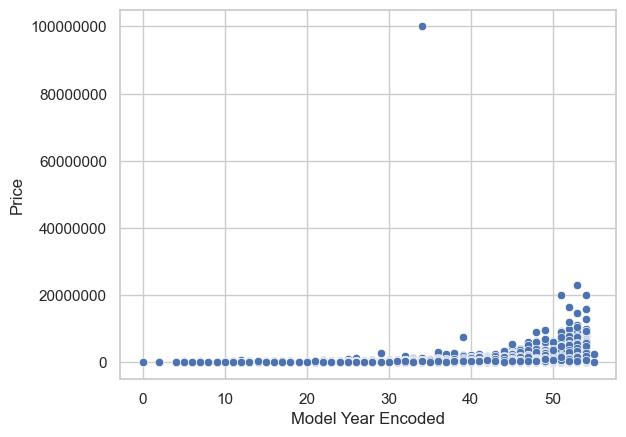

In [836]:
sns.set(style="whitegrid")  # Set the style
sns.scatterplot(x='Model Year Encoded', y='Price', data=df)  # Line plot

# Change the tick label format to display the full number
plt.ticklabel_format(style='plain', axis='both')  # Display the full number instead of scientific notation

# Show plot
plt.show()

In [837]:
df[(df['Model Year Encoded'] >= 30) & (df['Model Year Encoded'] <= 40) & (df['Price'] > 10000000)]


,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo
2467,99999999.0,200000.0,Daewoo,Lanos,Damanhur,False,True,True,True,False,...,False,False,False,False,False,False,False,34,1,False


In [838]:
df = df[~(((df['Model Year Encoded'] >= 30) & (df['Model Year Encoded'] <= 40) & (df['Price'] > 10000000)))]

In [839]:
df=df[~((df['Model Year Encoded'] >= 50) & (df['Price'] > 15000000))]

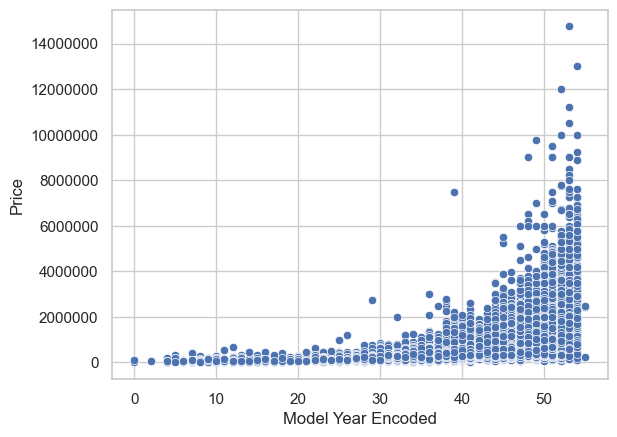

In [840]:
sns.set(style="whitegrid")  # Set the style
sns.scatterplot(x='Model Year Encoded', y='Price', data=df)  # Line plot

# Change the tick label format to display the full number
plt.ticklabel_format(style='plain', axis='both')  # Display the full number instead of scientific notation

# Show plot
plt.show()

In [841]:
df=df[~((df['Model Year Encoded'] >= 50) & (df['Price'] > 9000000))]

In [842]:
def scatter(df, horiz, vert):
    sns.set(style="whitegrid")  # Set the style
    sns.scatterplot(x=horiz, y=vert, data=df)  # Line plot

    # Change the tick label format to display the full number
    plt.ticklabel_format(style='plain', axis='both')  # Display the full number instead of scientific notation

    # Show plot
    plt.show()

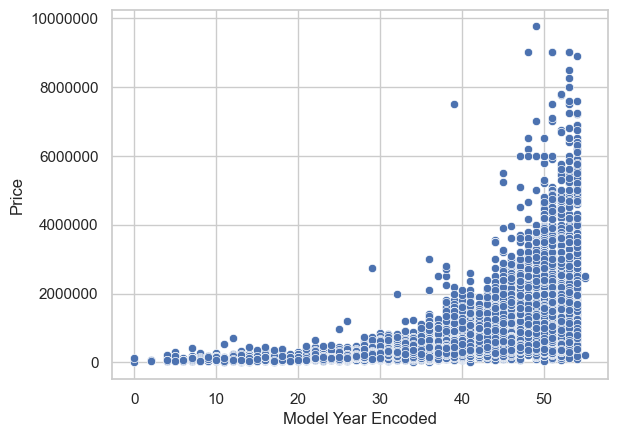

In [843]:
scatter(df, 'Model Year Encoded', 'Price')

In [844]:
df=df[~((df['Price'] > 8600000))]
df=df[~((df['Model Year Encoded'] <= 40) & (df['Price'] > 6000000))]
df=df[~((df['Model Year Encoded'] <= 38) & (df['Price'] > 2300000))]


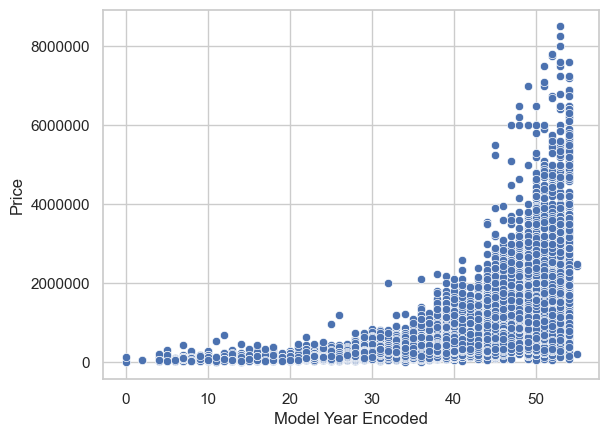

In [845]:
scatter(df, 'Model Year Encoded', 'Price')

In [846]:
df=df[~((df['Model Year Encoded'] <= 35) & (df['Price'] > 1900000))]
df=df[~((df['Model Year Encoded'] <= 45) & (df['Model Year Encoded'] >= 40) & (df['Price'] > 5000000))]

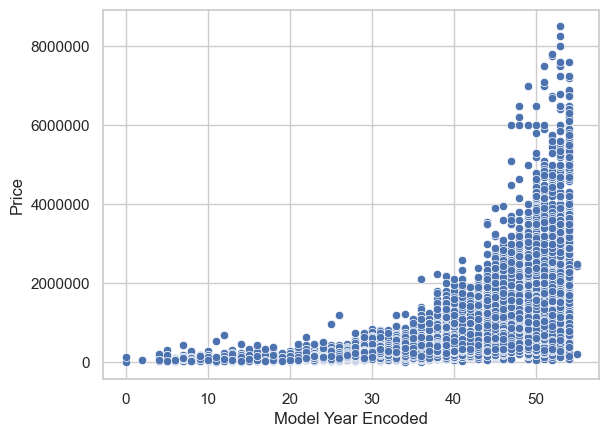

In [847]:
scatter(df, 'Model Year Encoded', 'Price')

In [848]:
df=df[~((df['Model Year Encoded'] >= 10) & (df['Price'] < 100000))]

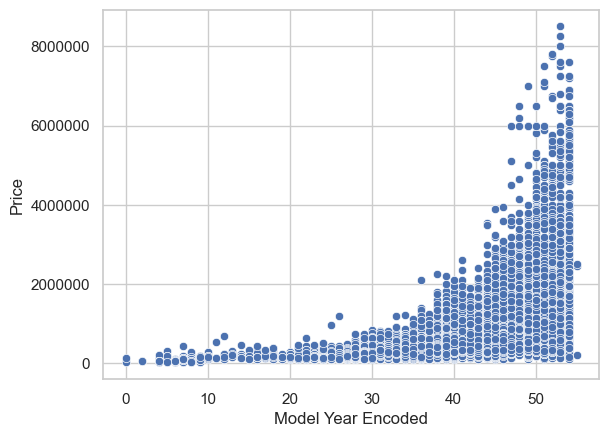

In [849]:
scatter(df, 'Model Year Encoded', 'Price')

In [850]:
df=df[~((df['Model Year Encoded'] >= 25) & (df['Price'] < 150000))]

In [851]:
df=df[~((df['Model Year Encoded'] >= 50) & (df['Price'] < 250000))]

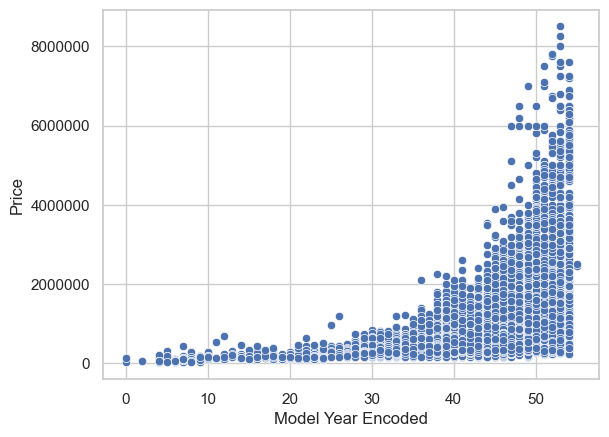

In [852]:
scatter(df, 'Model Year Encoded', 'Price')

In [853]:
df=df[~((df['Model Year Encoded'] >= 40) & (df['Price'] < 200000))]

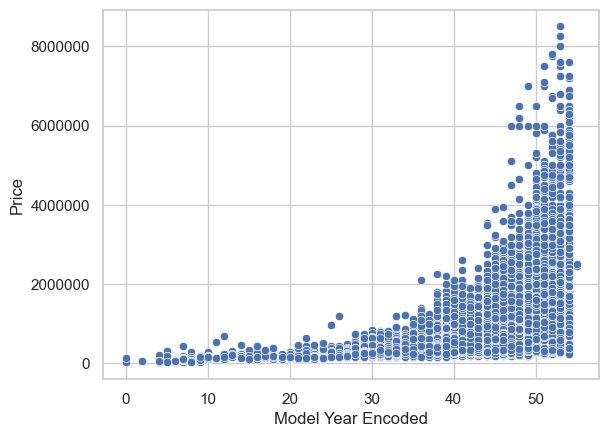

In [854]:
scatter(df, 'Model Year Encoded', 'Price')

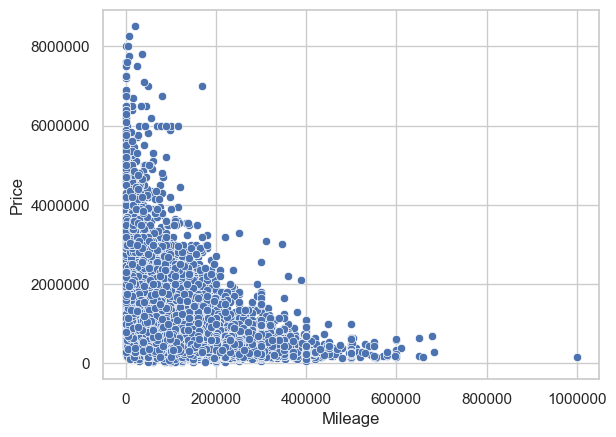

In [855]:
scatter(df, 'Mileage', 'Price')

In [856]:
df=df[~((df['Mileage'] >= 500000))]

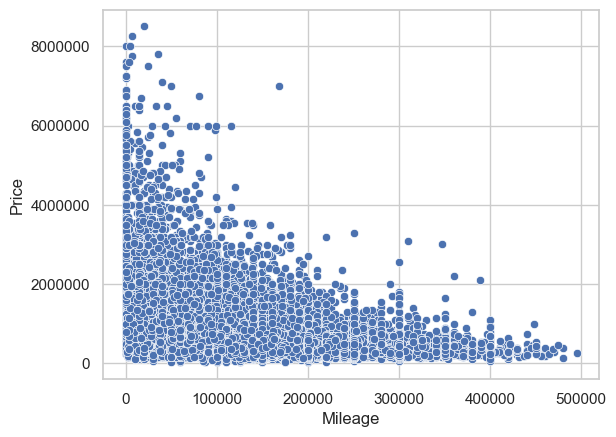

In [857]:
scatter(df, 'Mileage', 'Price')

In [858]:
df=df[~((df['Mileage'] >= 100000) & (df['Mileage'] <= 200000) & (df['Price'] > 6000000))]
df=df[~((df['Mileage'] >= 200000) & (df['Mileage'] <= 400000) & (df['Price'] > 2300000))]

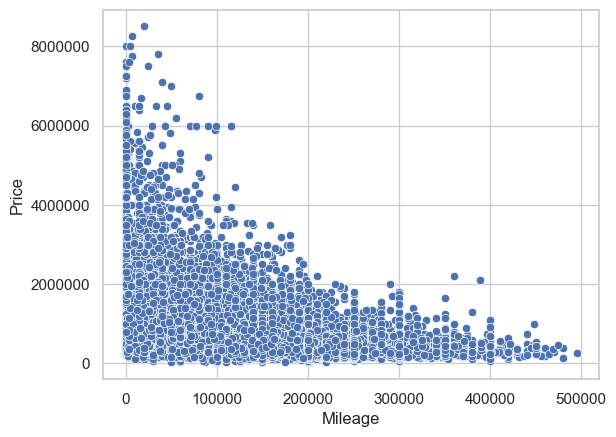

In [859]:
scatter(df, 'Mileage', 'Price')

In [860]:
df=df[~((df['Mileage'] >= 300000) & (df['Mileage'] <= 400000) & (df['Price'] > 2000000))]

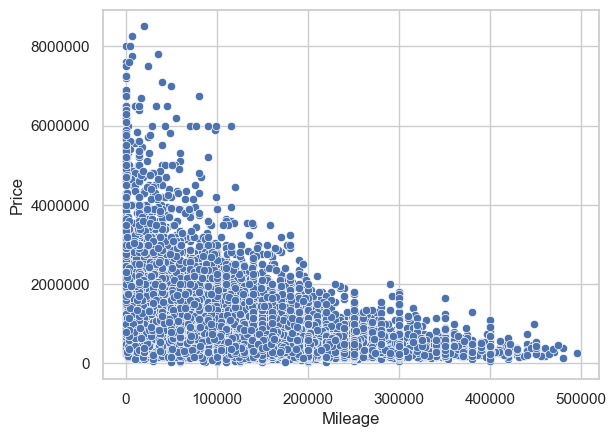

In [861]:
scatter(df, 'Mileage', 'Price')

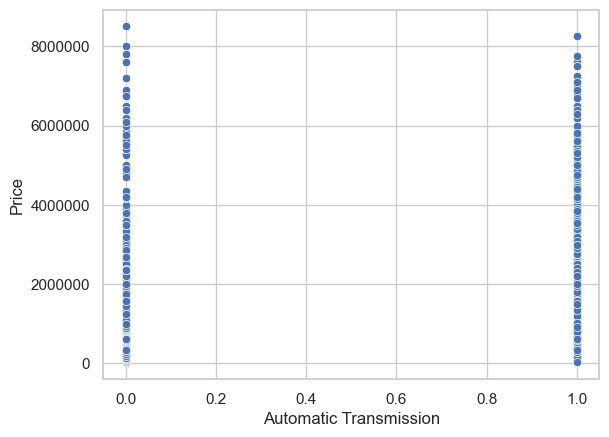

In [862]:
scatter(df, 'Automatic Transmission', 'Price')

In [863]:
df[df["Price"]<100000]

,Price,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Beige,...,Tala,Tanta,Touhk,Warraq,Zagazig,Zamalek,Zefta,Model Year Encoded,Month Encoded,In Cairo
233,65000.0,100000.0,Volkswagen,Beetle,Cairo,False,False,False,True,False,...,False,False,False,False,False,False,False,2,2,True
258,65000.0,200000.0,Fiat,128,Dakahlia,False,False,False,False,False,...,False,False,False,False,False,False,False,7,2,False
581,35000.0,200000.0,Lada,1500,Alexandria,False,False,False,False,False,...,False,False,False,False,False,False,False,4,2,False
691,65000.0,400000.0,Peugeot,504,Asyut,False,False,False,False,False,...,False,False,False,False,False,False,False,4,2,False
1263,95000.0,110000.0,Peugeot,504,Cairo,False,False,False,False,False,...,False,False,False,False,False,False,False,5,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19347,30000.0,150000.0,Fiat,128,El Minya,False,False,False,False,False,...,False,False,False,False,False,False,False,9,0,False
19350,50000.0,175000.0,Fiat,131,El Salam City,False,False,False,False,False,...,False,False,False,False,False,False,False,8,0,True
19465,90000.0,150000.0,Chevrolet,Caprice,Alexandria,True,False,False,False,False,...,False,False,False,False,False,False,False,9,0,False
19497,95000.0,95000.0,Volkswagen,Beetle,Tanta,False,False,False,False,False,...,False,True,False,False,False,False,False,9,0,False


In [864]:
# Filter rows based on the condition where 'Price' is greater than 7000000
filtered_rows = df[df["Price"] > 7000000]

# Get the names of columns where the value is True for the filtered rows
true_columns_filtered_rows = filtered_rows.columns[filtered_rows.any()]

# Output the columns where the value is True for the filtered rows
print("Columns where the value is True for rows where Price > 7000000:")
print(true_columns_filtered_rows)


Columns where the value is True for rows where Price > 7000000:
Index(['Price', 'Mileage', 'Make', 'Model', 'City', 'Automatic Transmission',
       'Air Conditioner', 'Power Steering', 'Remote Control', 'Black',
       'Dark grey', 'Gray', 'Red', 'Silver', 'White', 'Make Model', 'BMW M4',
       'Land Rover Range Rover Sport', 'Mercedes 500', 'Mercedes E 200',
       'Mercedes EQE', 'Mercedes EQS', 'Mercedes GLC 200', 'Mercedes GLE',
       'Mercedes GLS', 'Tesla Model Y', 'Toyota Land Cruiser', 'Toyota Prado',
       'Alexandria', 'Banha', 'Cairo', 'Giza', 'Nasr city', 'Obour City',
       'Sadat City', 'Sheikh Zayed City', 'Tagamo3 - New Cairo',
       'Model Year Encoded', 'Month Encoded', 'In Cairo'],
      dtype='object')


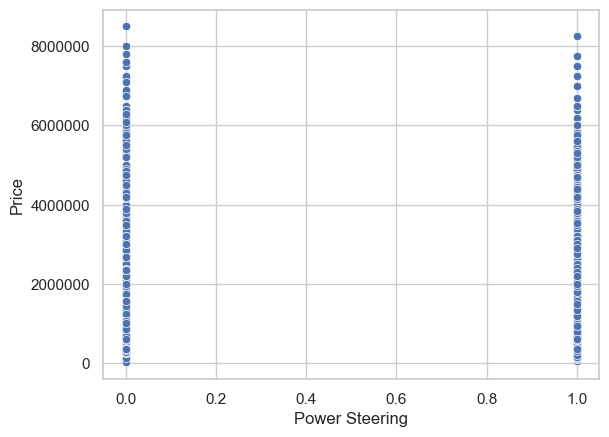

In [865]:
scatter(df, 'Power Steering', 'Price')

In [866]:
df=df[~(df["Mileage"]<5000)]

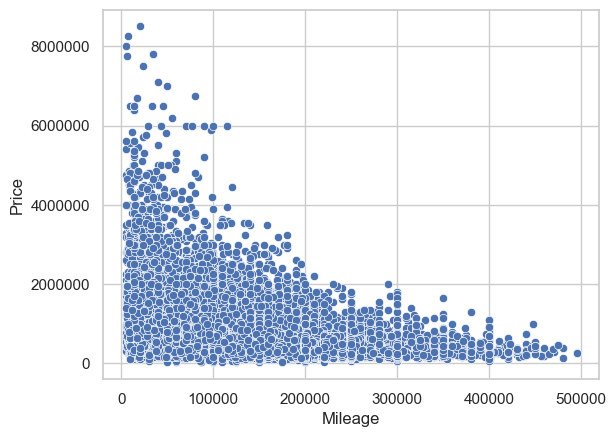

In [867]:
scatter(df, 'Mileage', 'Price')

We decided that we will consider cars that their prices range from 200k to 4 millions

In [868]:
df=df[~((df['Price'] > 4000000))]

In [869]:
df=df[~((df['Price'] < 200000))]

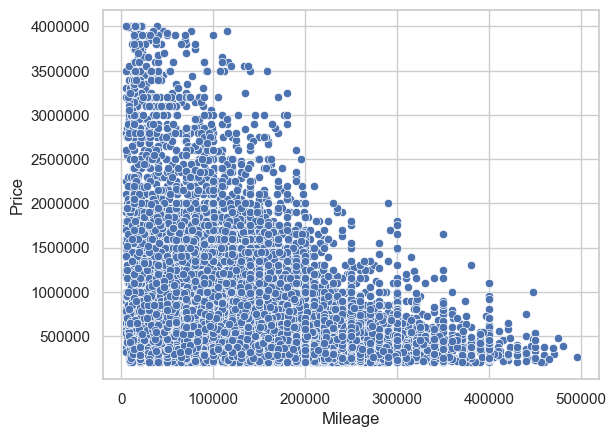

In [870]:
scatter(df, 'Mileage', 'Price')

In [871]:
columns_to_remove = df.columns[~df.any(axis=0)]

In [872]:
columns_to_remove

Index(['Alfa Romeo Tonale', 'Aston Martin Vantage', 'Audi Q8', 'Audi SQ8',
       'BMW I8', 'BMW IX3', 'BMW M4', 'BMW X7', 'Bentley Bentayga',
       'Bestune T77 Pro',
       ...
       'Toyota Corona', 'Toyota Crown', 'Toyota Starlet', 'Vgv U70 Pro',
       'Volkswagen Fox', 'Volkswagen Pointer', 'Volkswagen T-Roc', 'Volvo 240',
       'Volvo 460', 'Zotye Z200'],
      dtype='object', length=143)

In [873]:
df = df.drop(columns=columns_to_remove)

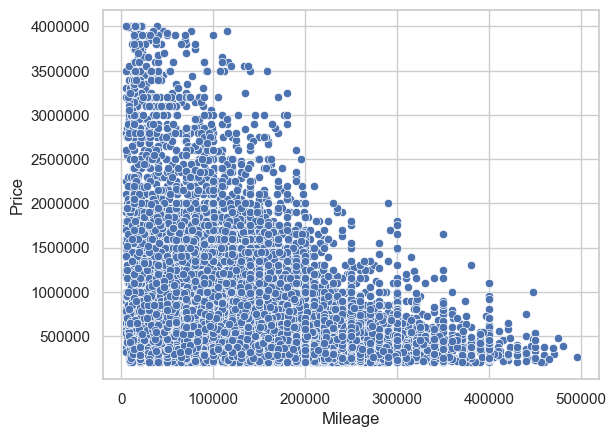

In [874]:
scatter(df, 'Mileage', 'Price')

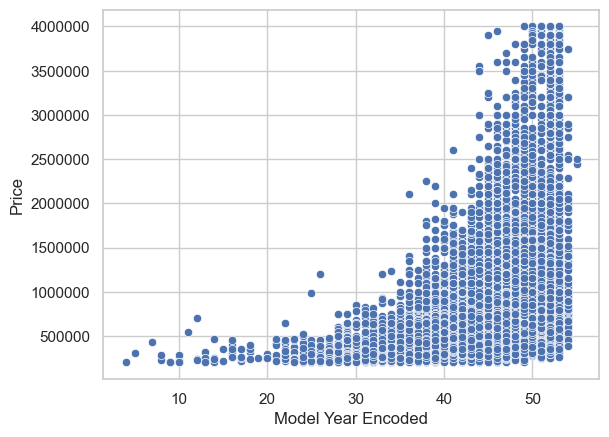

In [875]:
scatter(df, 'Model Year Encoded', 'Price')

C:\Users\anaya\AppData\Local\Temp\ipykernel_25324\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

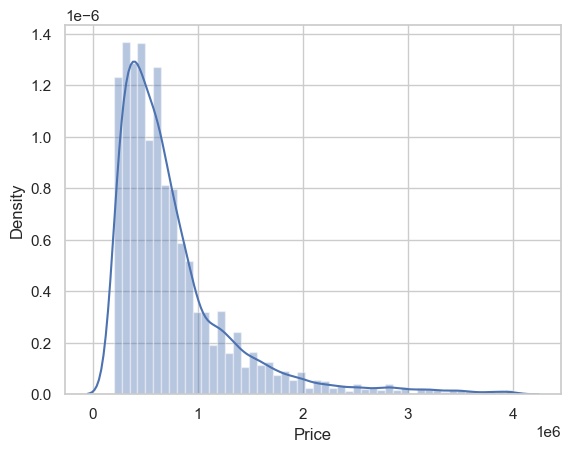

In [876]:
sns.distplot(df["Price"])

In [877]:
df.to_csv('hatla2ee_scraped_data_cleaned.csv', index=False)

In [879]:
df=df.drop(columns=['Make Model','Make','Model', 'City'])

Now we are done with the outliers and EDA & Feature Engineering in general. We will now start creating a model to predit the price.

# Model Creation and Tuning 

### we will now create multiple models (Linear Regression, Decision Tree, Random First, Adaptive and Gradient Boosting) and we will evaluate them to choose the best mode

## Linear Regression

In [918]:
X = df.drop('Price',axis=1)
y = df['Price']

In [919]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

We will use grid search so we will only take 20% as test size

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [921]:
from sklearn.preprocessing import StandardScaler

In [922]:
scaler = StandardScaler()

In [923]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [924]:
from sklearn.linear_model import ElasticNet

In [925]:
base_elastic_model = ElasticNet(random_state=18)

In [926]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [927]:
from sklearn.model_selection import GridSearchCV

In [928]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [929]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.432e+11, tolerance: 3.718e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.445e+11, tolerance: 3.766e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.136e+11, toleranc

C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.356e+13, tolerance: 3.776e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.586e+12, tolerance: 3.718e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.665e+12, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(random_state=18),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [930]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [931]:
y_pred = grid_model.predict(X_test)

In [932]:
np.mean(df['Price'])

766222.2346384847

In [933]:
len(y_test)

3464

In [934]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Assuming y_true contains the true target values and y_pred contains the predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)



In [935]:
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("Mean Absolute Percentage Error:", mape)

In [936]:
calculate_metrics(y_test, y_pred)

Mean Squared Error: 61191842838.247375
Mean Absolute Error: 144188.61038167644
R-squared: 0.8127507579691194
Mean Absolute Percentage Error: 23.5088071689142


In [937]:
y_pred[0:50]

array([ 413411.42674379,  348135.11035355,  573018.4599234 ,
        306003.46684038,  199550.06668484,  391739.29760196,
        270983.80365157, 1103338.7250014 ,  695617.52111747,
       2870442.89179133,  308196.94949411,  361118.567741  ,
        977390.31190501,  446580.08123666, 1495591.1265015 ,
       1116131.56082664,  293600.4091178 ,  610419.8592271 ,
        413022.07078171, 2018630.27870104,  462655.1099027 ,
        423151.75449922,  591715.41173533,  650906.63498578,
        461044.26289096,  779206.6262619 , 2737750.77769294,
        715065.73548155,  779938.65164376,  461429.14213052,
        701699.43977357,  285283.59524627, 2002848.63903462,
        594395.51730373, 1134467.08815179,  568617.48540169,
        512713.00367817, 1126809.81074688,  904050.82302329,
       1680073.14972264,  718113.22698691,  600935.78315206,
        780347.8059429 ,  275144.78515793,  641059.65379791,
        827186.31271875, 1347339.91213048,  320677.13243685,
        873637.92397642,

## Decision Tree Regression

In [938]:
from sklearn.tree import DecisionTreeRegressor

In [939]:
dt_regressor = DecisionTreeRegressor(random_state=18)

In [940]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=18)

In [941]:
y_pred = dt_regressor.predict(X_test)

In [942]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [943]:
calculate_metrics(y_test, y_pred)

Mean Squared Error: 88769038049.13568
Mean Absolute Error: 145197.8429561201
R-squared: 0.7283635478269717
Mean Absolute Percentage Error: 19.26186533378566


In [944]:
y_pred[0:50]

array([ 360000.,  435000.,  610000.,  280000.,  210000.,  350000.,
        275000.,  640000.,  670000., 3300000.,  450000.,  275000.,
        950000.,  355000.,  980000., 1200000.,  230000.,  450000.,
        340000.,  400000.,  500000.,  450000.,  590000.,  590000.,
        575000.,  730000., 2600000.,  750000.,  750000.,  490000.,
        740000.,  345000., 2600000.,  545000., 1150000.,  530000.,
        230000.,  650000., 1150000., 2400000.,  715000.,  620000.,
        650000.,  300000.,  700000.,  725000., 1750000.,  590000.,
       1320000.,  570000.])

In [945]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [946]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_dt_regressor = grid_search.best_estimator_

y_pred_best = best_dt_regressor.predict(X_test)

calculate_metrics(y_test, y_pred_best)

Mean Squared Error: 83430856448.86888
Mean Absolute Error: 139110.11747291873
R-squared: 0.7446985757017717
Mean Absolute Percentage Error: 18.442446888864186


In [947]:
y_pred_best[0:50]

array([ 391166.66666667,  435000.        ,  573571.42857143,
        258333.33333333,  231875.        ,  373600.        ,
        281666.66666667,  576111.11111111,  672857.14285714,
       3350000.        ,  468333.33333333,  271666.66666667,
        960000.        ,  367500.        , 1326000.        ,
       1140555.55555556,  226666.66666667,  482857.14285714,
        330000.        ,  406250.        ,  532500.        ,
        430000.        ,  572222.22222222,  631000.        ,
        528333.33333333,  797375.        , 2600000.        ,
        750000.        ,  693333.33333333,  495000.        ,
        760000.        ,  313571.42857143, 2600000.        ,
        569166.66666667, 1162500.        ,  535000.        ,
        258333.33333333,  631500.        , 1150000.        ,
       2031875.        ,  717000.        ,  656875.        ,
        643333.33333333,  290000.        ,  697500.        ,
        720555.55555556, 1625000.        ,  585714.28571429,
       1273333.33333333,

## Random Forest Regression

In [948]:
from sklearn.ensemble import RandomForestRegressor

In [949]:
rf_regressor = RandomForestRegressor(random_state=18)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=18)

In [950]:
y_pred = rf_regressor.predict(X_test)

In [951]:
calculate_metrics(y_test,y_pred)

Mean Squared Error: 62474296095.16524
Mean Absolute Error: 119867.95793833857
R-squared: 0.8088264048338056
Mean Absolute Percentage Error: 15.90570818752546


In [952]:
y_pred[0:50]

array([ 338770.  ,  431600.  ,  572250.  ,  242670.  ,  247450.  ,
        361390.  ,  314510.  ,  647050.  ,  722825.  , 3299400.  ,
        363890.  ,  310700.  ,  956050.  ,  433300.  ,  910000.  ,
       1128950.  ,  232800.  ,  562950.  ,  307760.  , 1122100.  ,
        489050.  ,  400349.97,  612620.  ,  666850.  ,  602220.  ,
        742900.  , 2402150.  ,  553140.  ,  624950.  ,  493650.  ,
        719150.  ,  334040.  , 1682450.  ,  584770.  ,  812550.  ,
        547050.  ,  247000.  ,  593740.  ,  959001.  , 2154750.  ,
        671650.  ,  653000.  ,  728300.  ,  308200.  ,  620000.  ,
        880800.  , 1660350.  ,  581150.  , 1082199.99,  578050.  ])

In [953]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [954]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=18), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error')

In [955]:
grid_search.fit(X_train, y_train)

C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\anaya\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\anaya\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=18), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [956]:
best_rf_regressor = grid_search.best_estimator_

In [957]:
y_pred_best = best_rf_regressor.predict(X_test)

In [958]:
calculate_metrics(y_test, y_pred_best)

Mean Squared Error: 86035555797.65176
Mean Absolute Error: 163058.71464119593
R-squared: 0.736728101923638
Mean Absolute Percentage Error: 23.94706241565879


In [959]:
y_pred_best[0:50]

array([ 509526.66666667,  429419.44222222,  590226.66666667,
        318999.16666667,  377316.66666667,  374396.66666667,
        527900.        ,  774650.        ,  760816.66666667,
       2958833.33333333,  396133.33333333,  370933.33333333,
        925776.66666667,  413863.33333333, 1227433.33333333,
       1116466.66666667,  397256.66666667,  734539.99666667,
        378143.33333333,  713666.66666667,  605446.66666667,
        413026.64666667,  536730.        ,  681863.33333333,
        549255.55555556,  781963.33333333, 2455983.33333333,
        587314.44444444,  733750.        ,  415600.        ,
        753683.33333333,  417990.        , 1627746.66666667,
        643496.66666667,  735446.84888889,  525616.66666667,
        290157.40740741,  777483.66666667,  934017.        ,
       1584816.66666667,  873783.33333333,  597512.77777778,
        827673.32      ,  352193.33333333,  602436.66666667,
        920653.33333333, 1485750.        ,  452486.66666667,
       1151050.        ,

## Gradient Boosting

In [960]:
from sklearn.ensemble import GradientBoostingRegressor

In [961]:
gb = GradientBoostingRegressor(random_state=18)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=18)

In [962]:
y_pred = gb.predict(X_test)

In [963]:
calculate_metrics(y_test, y_pred)

Mean Squared Error: 122819913004.22298
Mean Absolute Error: 226370.15857934748
R-squared: 0.6241666446109251
Mean Absolute Percentage Error: 36.08982783099834


## Adaptive Boosting

In [964]:
from sklearn.ensemble import AdaBoostRegressor

In [965]:
ada = AdaBoostRegressor(random_state=18)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=18)

In [966]:
y_pred = ada.predict(X_test)

In [967]:
calculate_metrics(y_test, y_pred)

Mean Squared Error: 266213782873.59692
Mean Absolute Error: 378164.5292425944
R-squared: 0.1853762405387599
Mean Absolute Percentage Error: 65.27366394479752


### As we can see the Linear Regression (With Elastic Net and Grid Search) and Random Forest (Without Grid Search) have the best performance with both have R-Squared of 0.8, However, we will choose Random Forest because it's Mean Absolute Percentage Error is lower and it does not use Grid Search, so it is computationaly less expensive than the Linear Regression model

In [968]:
import joblib

In [969]:
joblib.dump(rf_regressor, 'hatla2ee_model.joblib')

['hatla2ee_model.joblib']

In [970]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## After choosing the model, we created an interface using streamlit library (you can find it, named app.py)